In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/profvohra/DS-datasets/refs/heads/main/heaton-research/WineQTRegression.csv"

In [ ]:
data = pd.read_csv(url)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.141081
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,4.252022
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4.252022
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3.165538
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.141081
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,4.272325
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,4.802720
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,3.050067
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3.838173


In [ ]:
features = data.drop('quality', axis= 1).values
quality = data['quality'].values

In [ ]:
import torch

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(features, quality, test_size=0.2, random_state=11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_valid_scaled = scalar.transform(X_valid)

In [ ]:
data.shape

(1143, 12)

#2.There needs to be 11 input neurons for the 11 features.

In [ ]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_valid = torch.tensor(X_valid_scaled, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).unsqueeze(1)

Building The Neural Network

In [ ]:
from fastai.tabular.all import *

In [ ]:
train_ds = list(zip(X_train, y_train))
valid_ds = list(zip(X_valid, y_valid))

In [ ]:
len(train_ds), len(valid_ds)

(914, 229)

In [ ]:
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=64, shuffle=True)

In [ ]:
dls = DataLoaders(train_dl, valid_dl)

In [ ]:
import torch.nn as nn
model = nn.Sequential()

In [ ]:
model.add_module('input', nn.Linear(11, 32))
model.add_module('activ1', nn.ReLU())
model.add_module('hidden1', nn.Linear(32, 16))
model.add_module('activ2', nn.ReLU())
model.add_module('output', nn.Linear(16, 1))

In [ ]:
!pip install torchview
from torchview import draw_graph

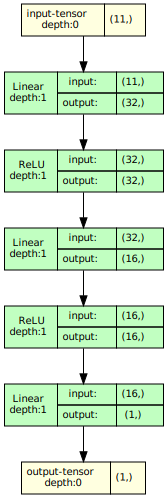

In [ ]:
model_graph = draw_graph(model, input_size=(11,))
model_graph.visual_graph

Fitting The Model, and Defining Loss Func

In [ ]:
loss_func = nn.MSELoss()
learn = Learner(dls, model, loss_func=loss_func,metrics=[rmse])

In [ ]:
learn.fit(n_epoch = 10, lr=0.001)

epoch,train_loss,valid_loss,_rmse,time
0,18.596897,17.533058,4.187249,00:00
1,17.431814,15.638410,3.954543,00:00
2,16.243824,13.418077,3.663069,00:00
3,14.753875,10.813262,3.288352,00:00
4,13.031805,8.027982,2.833369,00:00
5,11.121483,5.495912,2.344336,00:00
6,9.230433,3.598450,1.896958,00:00
7,7.520955,2.540790,1.593986,00:00
8,6.157722,2.115452,1.454459,00:00
9,5.107880,1.905089,1.380250,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

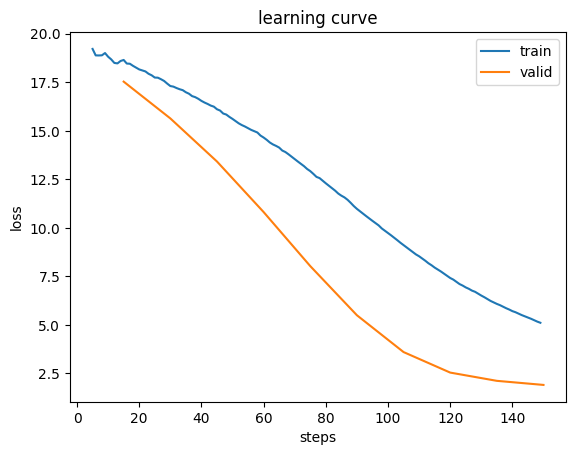

In [ ]:
learn.recorder.plot_loss()

#5. The loss tends to decrease by each epoch.
#6. We would not have gotten away with fewer epochs because the model will underfit, ie. not learning the data enough.
#7. The model should train for more epochs to lower loss further, but not too much or else the model will memorize the data and simply overfit.

In [ ]:
from fastai.metrics import rmse
valid_preds, valid_targets = learn.get_preds()
rmse_score = rmse(valid_preds, valid_targets)

In [ ]:
valid_preds_np = valid_preds.squeeze().numpy()
valid_targets_np = valid_targets.squeeze().numpy()

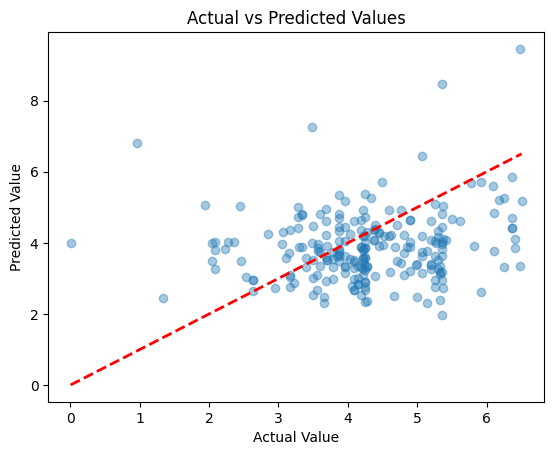

In [ ]:
plt.figure()
plt.scatter(valid_targets_np, valid_preds_np, alpha=0.4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.plot([min(valid_targets_np), max(valid_targets_np)], [min(valid_targets_np),max(valid_targets_np)], 'r--', lw=2)
plt.show()